In [1]:
# Run each time you're on a new Google CoLab setup or 
! pip install nltk
! pip install bs4
! pip install requests
import nltk
nltk.download('punkt')
nltk.download('words')
nltk.download('book')

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kelvi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\kelvi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.
[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\kelvi\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\kelvi\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown.zip.
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\kelvi\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\chat80.zip.
[nltk_data]    | Downloading package cmudict

True

In [2]:
from bs4 import BeautifulSoup
import nltk
import requests

In [19]:
text = requests.get("http://inta.gatech.s3.amazonaws.com/crime_and_punishment.txt").text
# text = requests.get("http://www.gutenberg.org/files/2554/2554.txt").content
print(text[0:100]) # Here are the first 100 characters of Project Gutenberg's crime and punishment
print('length of text: %s characters' % len(text))

ï»¿The Project Gutenberg EBook of Crime and Punishment, by Fyodor Dostoevsky

This eBook is for th
length of text: 1177120 characters


In [21]:
# text

In [4]:
tokens = nltk.word_tokenize(text)
# print the number of word "tokens" in the book:
print('There are %s words in crime and punishment' % len(tokens))

There are 253750 words in crime and punishment


In [25]:
tokens[0:20]
# could be duplicated, saw "NEWS" alot

['BBC',
 'NEWS',
 '|',
 'Health',
 '|',
 'Blondes',
 "'to",
 'die',
 'out',
 'in',
 '200',
 "years'",
 'NEWS',
 'SPORT',
 'WEATHER',
 'WORLD',
 'SERVICE',
 'A-Z',
 'INDEX',
 'SEARCH']

In [41]:
text = nltk.Text(tokens)
# Create an NLTK text object, in case you want to use some of the nltk.text functions
# http://www.nltk.org/api/nltk.html#module-nltk.text 
print(text[500])

a


In [42]:
text.encode()

AttributeError: 'Text' object has no attribute 'encode'

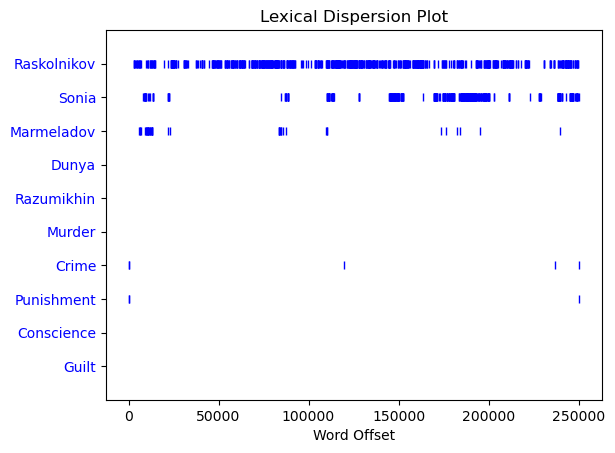

In [45]:
words_to_track = ['Raskolnikov', 'Sonia', 'Marmeladov', 'Dunya', 'Razumikhin','Murder','Crime','Punishment','Conscience','Guilt']

# Generate the dispersion plot
text.dispersion_plot(words_to_track)

In [47]:
# Do word counts using the defaultdict construction in python
# Defaultdicts are dicts where looking for a missing key gives a default value instead of an error
# An int-based defaultdict would return a zero-integer. So starting with a defaultdict and 
# incrementing hte value every time a word occurs will give a word count
from collections import defaultdict
counts=defaultdict(int)
for word in text:
    counts[word]+=1
print('the word "%s" appeared %s times' % ('kill',counts['kill']))
print('the word "%s" appeared %s times' % ('life',counts['life']))
print('the word "%s" appeared %s times' % ('the',counts['the']))
# To sort the wordcount, do:
sorted_counts=sorted(counts.items(), key=lambda x: -x[1])
print('the word "%s" is the most common, appearing %s times' % (sorted_counts[0][0], sorted_counts[0][1]))
sorted_counts

the word "kill" appeared 26 times
the word "life" appeared 135 times
the word "the" appeared 7431 times
the word "," is the most common, appearing 16176 times


[(',', 16176),
 ('.', 9854),
 ('the', 7431),
 ('and', 6279),
 ('to', 5276),
 ('a', 4469),
 ('I', 4366),
 ("''", 4192),
 ('of', 3847),
 ('``', 3739),
 ('he', 3520),
 ('you', 3485),
 ('in', 3097),
 ('that', 3049),
 ('it', 2928),
 ('was', 2831),
 ('!', 2364),
 ('?', 2275),
 ('his', 1999),
 ('at', 1945),
 ('her', 1772),
 ('not', 1760),
 ('with', 1723),
 ("'s", 1628),
 ('for', 1593),
 ('had', 1587),
 ('him', 1579),
 ('on', 1436),
 ('is', 1424),
 ('she', 1245),
 ('He', 1240),
 ('all', 1229),
 ('as', 1148),
 ('have', 1139),
 ('be', 1130),
 ('but', 1116),
 ('...', 1085),
 ("n't", 1065),
 ('me', 1063),
 (';', 1049),
 ('are', 842),
 ('do', 833),
 ('so', 800),
 ('Raskolnikov', 778),
 ('what', 753),
 ('my', 740),
 ('And', 737),
 ('from', 716),
 ('were', 712),
 ('But', 683),
 ('....', 682),
 ('out', 679),
 ('--', 667),
 ('up', 649),
 ('your', 635),
 ('this', 624),
 ('there', 601),
 ('they', 600),
 ('them', 594),
 ('You', 588),
 ('would', 587),
 ('one', 581),
 ('been', 576),
 ('The', 551),
 ('by', 5

In [49]:
# An alternative way to do word counts is the "Counter" object
from collections import Counter
counts = Counter(text)
print('the word "%s" appeared %s times' % ('the',counts['the']))
sorted_counts=sorted(counts.items(), key=lambda x: -x[1])
sorted_counts
# If you print "counts", it will print the sorted wordcount

the word "the" appeared 7431 times


[(',', 16176),
 ('.', 9854),
 ('the', 7431),
 ('and', 6279),
 ('to', 5276),
 ('a', 4469),
 ('I', 4366),
 ("''", 4192),
 ('of', 3847),
 ('``', 3739),
 ('he', 3520),
 ('you', 3485),
 ('in', 3097),
 ('that', 3049),
 ('it', 2928),
 ('was', 2831),
 ('!', 2364),
 ('?', 2275),
 ('his', 1999),
 ('at', 1945),
 ('her', 1772),
 ('not', 1760),
 ('with', 1723),
 ("'s", 1628),
 ('for', 1593),
 ('had', 1587),
 ('him', 1579),
 ('on', 1436),
 ('is', 1424),
 ('she', 1245),
 ('He', 1240),
 ('all', 1229),
 ('as', 1148),
 ('have', 1139),
 ('be', 1130),
 ('but', 1116),
 ('...', 1085),
 ("n't", 1065),
 ('me', 1063),
 (';', 1049),
 ('are', 842),
 ('do', 833),
 ('so', 800),
 ('Raskolnikov', 778),
 ('what', 753),
 ('my', 740),
 ('And', 737),
 ('from', 716),
 ('were', 712),
 ('But', 683),
 ('....', 682),
 ('out', 679),
 ('--', 667),
 ('up', 649),
 ('your', 635),
 ('this', 624),
 ('there', 601),
 ('they', 600),
 ('them', 594),
 ('You', 588),
 ('would', 587),
 ('one', 581),
 ('been', 576),
 ('The', 551),
 ('by', 5

In [8]:
#How many unique words are there?
#This should be the length of the word count dictionary
print('There are %s unique words' % len(sorted_counts))

There are 11247 unique words


In [9]:
# To figure out how many of these words are English words, we need an english dictionary
english=nltk.corpus.words.words('en')

print(english[0:15])
# load an english dictionary (i.e. list of english words) from nltk

english = list(set([w.lower() for w in english]))
# Then make sure all words are lowercase - so we would accept 'aaron' as a word, no matter the capitalization

['A', 'a', 'aa', 'aal', 'aalii', 'aam', 'Aani', 'aardvark', 'aardwolf', 'Aaron', 'Aaronic', 'Aaronical', 'Aaronite', 'Aaronitic', 'Aaru']


In [51]:
# esp=nltk.corpus.words.words('es')
# print(esp[0:15])

In [10]:
es=set(english)
ws=set(counts.keys())
overlap = ws.intersection(es)
missing = ws.difference(es)
print('%s of the words in C&P are in the English dictionary, out of %s' % (len(overlap),len(ws)))
print('A few c&p words missing from the english dictionary: %s' % str(list(missing)[0:10]))



6573 of the words in C&P are in the English dictionary, out of 11247
A few c&p words missing from the english dictionary: ['Thanks', 'low-pitched', 'Bend', 'savings', 'gesticulations', 'R-rubbish', 'Anxiety', 'advocating', 'savoury', 'sobs']


In [11]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [12]:
from collections import Counter
b=Counter(text)


Below this line, we're dealing with data downloaded from a website.

In [13]:
url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
url_response_object=requests.get(url)
url_response_object.raise_for_status()
html = url_response_object.content
print(html[0:100]) # Here's what some of the html looks like

b'<!doctype html public "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/loose'


In [57]:
html[0]

60

In [58]:
html[1]

33

In [59]:
html[2]

100

In [56]:
html[0:1]

b'<'

In [60]:
html[1:2]

b'!'

In [52]:
raw = BeautifulSoup(html).get_text()
print(raw[0:100]) # Here's what the text looks like, after removing these html tags



BBC NEWS | Health | Blondes 'to die out in 200 years'




































NEWS
  S


In [15]:
raw[1:100]

"\nBBC NEWS | Health | Blondes 'to die out in 200 years'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nNEWS\n\xa0\xa0S"

In [16]:
tokens = nltk.word_tokenize(raw)
print(tokens[0:15]) # Here we've split things out by whitespace into a list of "tokens" or words/punctuation

['BBC', 'NEWS', '|', 'Health', '|', 'Blondes', "'to", 'die', 'out', 'in', '200', "years'", 'NEWS', 'SPORT', 'WEATHER']


In [17]:
len(tokens)

745

In [18]:
tokens[0:10]

['BBC', 'NEWS', '|', 'Health', '|', 'Blondes', "'to", 'die', 'out', 'in']

In [61]:
tokens

['ï',
 '»',
 '¿The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'Crime',
 'and',
 'Punishment',
 ',',
 'by',
 'Fyodor',
 'Dostoevsky',
 'This',
 'eBook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 '.',
 'You',
 'may',
 'copy',
 'it',
 ',',
 'give',
 'it',
 'away',
 'or',
 're-use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'Project',
 'Gutenberg',
 'License',
 'included',
 'with',
 'this',
 'eBook',
 'or',
 'online',
 'at',
 'www.gutenberg.org',
 'Title',
 ':',
 'Crime',
 'and',
 'Punishment',
 'Author',
 ':',
 'Fyodor',
 'Dostoevsky',
 'Release',
 'Date',
 ':',
 'March',
 '28',
 ',',
 '2006',
 '[',
 'EBook',
 '#',
 '2554',
 ']',
 '[',
 'Last',
 'updated',
 ':',
 'November',
 '15',
 ',',
 '2011',
 ']',
 'Language',
 ':',
 'English',
 '*',
 '*',
 '*',
 'START',
 'OF',
 'THIS',
 'PROJECT',
 'GUTENBERG',
 'EBOOK',
 'CRIME',
 'AND',
 'PUNISHMENT',
 '*',
 '*',
 '*',
 'Prod

In [75]:
url = "https://m.gsmarena.com/sony_xperia_1_vi-review-2699.php"
url_response_object=requests.get(url)
url_response_object.raise_for_status()
html = url_response_object.content

In [76]:
raw_xperia=BeautifulSoup(html).get_text()

In [77]:
html

b'<!DOCTYPE html> \r\n<html class="no-js" lang="en">\r\n<head>\r\n<title>Sony Xperia 1 VI review - GSMArena.com tests</title>\r\n<script>\r\nDESKTOP_BASE_URL = "https://www.gsmarena.com/";\r\nASSETS_BASE_URL  = "https://fdn.gsmarena.com/vv/assets12/";\r\nCDN_BASE_URL = "//fdn.gsmarena.com/";\r\nCDN2_BASE_URL = "//fdn2.gsmarena.com/";\r\nMOBILE_BASE_URL = "https://m.gsmarena.com/";\r\nMOBILE_SITE = true;\r\n</script>\r\n\r\n<meta charset="utf-8">\r\n<meta name="HandheldFriendly" content="True">\r\n<meta name="MobileOptimized" content="320"/>\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, minimum-scale=1">\r\n<!-- style & grid -->\r\n<link rel="stylesheet" media="screen" href="https://fdn.gsmarena.com/vv/assets12/css/m/style2.css?v=122">\r\n<link rel="manifest" href="manifest.json" />\r\n<meta name="apple-mobile-web-app-capable" content="yes">\r\n<meta name="mobile-web-app-capable" content="yes">\r\n\r\n<!-- For everything else -->\r\n<link rel="s

In [78]:
tokens_xp = nltk.word_tokenize(raw_xperia)

In [79]:
tokens_xp[0:100]

['Sony',
 'Xperia',
 '1',
 'VI',
 'review',
 '-',
 'GSMArena.com',
 'tests',
 'Login',
 'I',
 'forgot',
 'my',
 'password',
 'Home',
 'Compare',
 'Tip',
 'us',
 'Privacy',
 'News',
 'Daily',
 'deals',
 'Rumor',
 'mill',
 'Merch',
 'Reviews',
 'Glossary',
 'Coverage',
 'Contact',
 'us',
 'Samsung',
 'Xiaomi',
 'Oneplus',
 'Google',
 'Apple',
 'Sony',
 'Motorola',
 'vivo',
 'Huawei',
 'Honor',
 'Oppo',
 '[',
 '...',
 ']',
 'Phone',
 'finder',
 'My',
 'phone',
 'Desktop',
 'version',
 'Android',
 'app',
 'GoAdvanced',
 'News',
 'Reviews',
 'Phones',
 'Home',
 'News',
 'Reviews',
 'Videos',
 'Comments',
 '(',
 '387',
 ')',
 'Post',
 'comment',
 'Specs',
 'Sony',
 'Xperia',
 '1',
 'VI',
 'review',
 'GSMArena',
 'Team',
 ',',
 '15',
 'May',
 '2024',
 '.',
 '1',
 '.',
 'Introduction',
 'and',
 'unboxing2',
 '.',
 'Design',
 'and',
 'build3',
 '.',
 'Lab',
 'tests',
 '-',
 'display',
 ',',
 'battery',
 'life',
 ',',
 'charging',
 'speed',
 ',',
 'speakers4']